# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function
2. plot the fit Data       
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

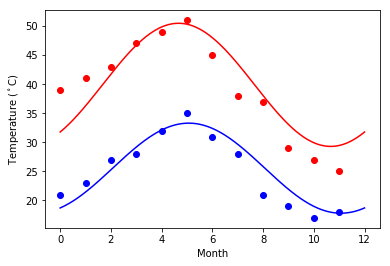

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp_max = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
temp_min = np.array([21,23,27,28,32,35,31,28,21,19,17,18])
months = np.arange(12)


# Fitting it to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                          temp_min, [-40, 20, 0])
# Plotting the fit

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


# This assignment is for visualization using matplotlib:
data to use:
url=
https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)            
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic_df = pd.read_csv(url)

# Create a pie chart presenting the male/female proportion

In [3]:
titanic_df=titanic_df.dropna(subset=['sex'])

In [4]:
titanic_df.groupby(['sex']).count()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,319,8,288
male,843,843,843,658,843,843,843,842,154,843,167,113,457


In [5]:
table = pd.pivot_table(data=titanic_df, values='ticket', index='sex', columns='survived', aggfunc='count')
print(table)

survived  0.0  1.0
sex               
female    127  339
male      682  161


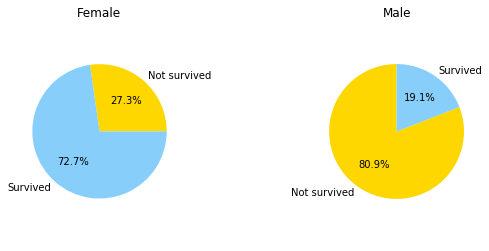

In [6]:
# Create the lists with survival values for each gender
pie_female = table.loc['female']
pie_male = table.loc['male']

# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# Create the pie chart on the first position with the given configurations
pie_1 = axes[0].pie(pie_female, labels=['Not survived','Survived'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
# Define this plot title
axes[0].set_title('Female')
# Make both axes equal, so that the chart is round
axes[0].axis('equal')
# Same as above, for the second pie chart
pie_2 = axes[1].pie(pie_male, labels=['Not survived','Survived'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
axes[1].set_title('Male')
plt.axis('equal')
# Adjust the space between the two charts
plt.subplots_adjust(wspace=1)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['sex']
for col in cat_vars:
    
    titanic_df[col]=labelEnc.fit_transform(titanic_df[col])
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


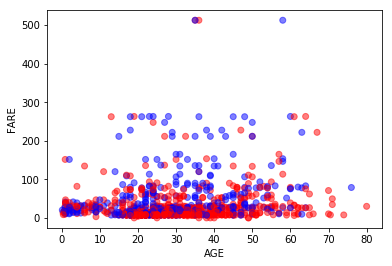

In [8]:
colors = np.where(titanic_df["sex"]==1,'r','b') # for male it is red, for female it is blue


scatter_plot = plt.scatter(titanic_df['age'], titanic_df['fare'],c=colors,alpha=0.5)
plt.xlabel('AGE')
plt.ylabel('FARE')
plt.show()